In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/unsupervised-logs-data/BGL_all_params.csv
/kaggle/input/unsupervised-logs-data/Thunderbird_all_params.csv
/kaggle/input/logs-params/BGL_test_params.csv
/kaggle/input/logs-params/Thunderbird_test_params.csv
/kaggle/input/logs-params/Thunderbird_train_params.csv
/kaggle/input/logs-params/BGL_train_params.csv


In [27]:
BGL= pd.read_csv("/kaggle/input/unsupervised-logs-data/BGL_all_params.csv")

In [28]:
BGL.head()

,Unnamed: 0,timestamp,text,label,filename,clusters,p-15-0,p-15-1,p-16-0,p-16-1,p-17-0
0,0,1.117868e+12,RAS LINKCARD INFO MidplaneSwitchController per...,False,R33-M1-L0-U22-C,15,NaN,NaN,NaN,NaN,NaN
1,1,1.117868e+12,RAS LINKCARD INFO MidplaneSwitchController per...,False,R27-M1-L3-U18-C,15,NaN,NaN,NaN,NaN,NaN
2,2,1.117869e+12,RAS LINKCARD INFO MidplaneSwitchController per...,False,R33-M1-L0-U22-C,15,NaN,NaN,NaN,NaN,NaN
3,3,1.117869e+12,RAS LINKCARD INFO MidplaneSwitchController per...,False,R27-M1-L3-U18-C,15,NaN,NaN,NaN,NaN,NaN
4,4,1.117870e+12,RAS APP FATAL ciod: LOGIN chdir(/p/gb2/draeger...,False,R23-M0-N4-I:J18-U11,16,NaN,NaN,NaN,NaN,NaN


In [29]:
normal= BGL['label'].value_counts()[0]
anomalous= BGL['label'].value_counts()[1]
print(f"There are {normal} normal logs and {anomalous} anomalous logs in this file")
print("Their ratio is "+ str(anomalous/normal))

There are 92262 normal logs and 7738 anomalous logs in this file
Their ratio is 0.08386984890854306


In [30]:
labels=BGL[['label']]

In [31]:
one_hot_encoded_BGL = pd.get_dummies(BGL['clusters'])
one_hot_encoded_BGL.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [32]:
for col in one_hot_encoded_BGL.columns:
    col_name= "c"+str(col)
    BGL[col_name]=one_hot_encoded_BGL[col]

In [33]:
BGL.drop(columns=['clusters','Unnamed: 0','timestamp','text','label','filename'], inplace=True)

In [34]:
BGL.fillna(0,inplace=True)

In [35]:
BGL.columns

Index(['p-15-0', 'p-15-1', 'p-16-0', 'p-16-1', 'p-17-0', 'c0', 'c1', 'c2',
       'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13',
       'c14', 'c15', 'c16', 'c17', 'c18', 'c19'],
      dtype='object')

# Isolation Tree

In [36]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [37]:
BGL.columns

Index(['p-15-0', 'p-15-1', 'p-16-0', 'p-16-1', 'p-17-0', 'c0', 'c1', 'c2',
       'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13',
       'c14', 'c15', 'c16', 'c17', 'c18', 'c19'],
      dtype='object')

In [38]:
random_state = np.random.RandomState(42)
model=IsolationForest()

model.fit(BGL)

#print(model.get_params())

IsolationForest()

In [39]:
BGL['anomaly_score'] = model.predict(BGL)

In [40]:
BGL['labels']=labels

In [41]:
condition1= BGL['labels']==True
condition2= BGL['anomaly_score']==-1
count=(condition1&condition2).sum()
print("The number of rows that meet the conditions: ",count)

The number of rows that meet the conditions:  0


# tSNE

In [42]:
from sklearn.manifold import TSNE

In [43]:
BGL_tsne= pd.read_csv("/kaggle/input/unsupervised-logs-data/BGL_all_params.csv")

In [44]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=0)

In [45]:
BGL_tsne= BGL_tsne.drop(['Unnamed: 0', 'timestamp','text','label','filename'], axis=1)

In [46]:
BGL_tsne= BGL_tsne.fillna(0)

In [47]:
BGL_tsne

,clusters,p-15-0,p-15-1,p-16-0,p-16-1,p-17-0
0,15,0.0,0.0,0.0,0.0,0.0
1,15,0.0,0.0,0.0,0.0,0.0
2,15,0.0,0.0,0.0,0.0,0.0
3,15,0.0,0.0,0.0,0.0,0.0
4,16,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
99995,8,0.0,0.0,0.0,0.0,0.0
99996,8,0.0,0.0,0.0,0.0,0.0
99997,8,0.0,0.0,0.0,0.0,0.0
99998,8,0.0,0.0,0.0,0.0,0.0


In [49]:
tsne_result = tsne.fit_transform(BGL_tsne)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.072s...
[t-SNE] Computed neighbors for 100000 samples in 18.837s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional proba

In [50]:
BGL_tsne['tsne_one'] = tsne_result[:,0]
BGL_tsne['tsne_two'] = tsne_result[:,1]

In [51]:
labels=BGL[['labels']]

In [52]:
BGL_tsne['labels']=labels

In [53]:
BGL_tsne.head()

,clusters,p-15-0,p-15-1,p-16-0,p-16-1,p-17-0,tsne_one,tsne_two,labels
0,15,0.0,0.0,0.0,0.0,0.0,7.968689,-3.997494,False
1,15,0.0,0.0,0.0,0.0,0.0,7.968689,-3.997494,False
2,15,0.0,0.0,0.0,0.0,0.0,7.968689,-3.997494,False
3,15,0.0,0.0,0.0,0.0,0.0,7.968689,-3.997494,False
4,16,0.0,0.0,0.0,0.0,0.0,11.268318,50.422421,False


In [62]:
tsne_cluster = BGL_tsne.groupby(['clusters','labels']).agg({'tsne_one':'mean','tsne_two':'mean'}).reset_index()

In [56]:
BGL_tsne.head()

,clusters,p-15-0,p-15-1,p-16-0,p-16-1,p-17-0,tsne_one,tsne_two,labels
0,15,0.0,0.0,0.0,0.0,0.0,7.968689,-3.997494,False
1,15,0.0,0.0,0.0,0.0,0.0,7.968689,-3.997494,False
2,15,0.0,0.0,0.0,0.0,0.0,7.968689,-3.997494,False
3,15,0.0,0.0,0.0,0.0,0.0,7.968689,-3.997494,False
4,16,0.0,0.0,0.0,0.0,0.0,11.268318,50.422421,False


In [57]:
BGL_tsne.loc[BGL_tsne["labels"] == False, "labels"] = "normal"
BGL_tsne.loc[BGL_tsne["labels"] == True, "labels"] = "anomaly"

In [63]:
tsne_cluster

,clusters,labels,tsne_one,tsne_two
0,0,normal,-4.114315,-48.136013
1,1,normal,9.040480,-24.066923
2,2,normal,-22.110678,-19.534502
3,3,normal,-5.997862,7.123082
4,4,normal,23.160227,13.521533
5,5,normal,35.975311,-4.370574
6,6,normal,22.567396,35.397110
7,7,normal,-35.754177,26.540543
8,8,anomaly,-42.951839,-17.513298
9,8,normal,-42.951839,-17.513298


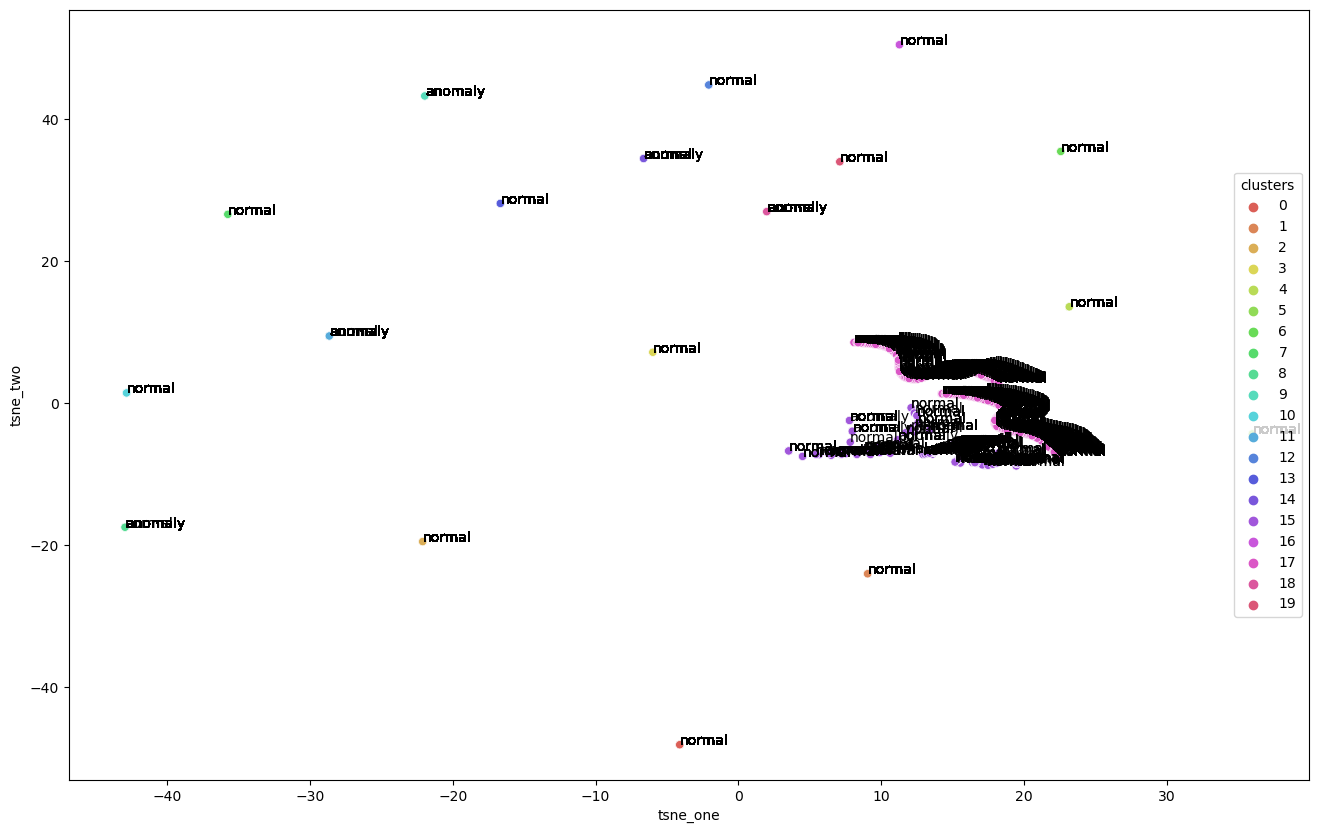

In [64]:
plt.figure(figsize=(16,10))
import seaborn as sns

x= BGL_tsne['tsne_one']
y=BGL_tsne['tsne_two']

ax= sns.scatterplot(
    x='tsne_one', y='tsne_two',
    hue="clusters",
    palette=sns.color_palette("hls", 20),
    data=BGL_tsne,
    legend="full",
    alpha=1
)

sns.move_legend(ax, "center right")
#annotate
labels= list(BGL_tsne['labels'])
for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]))

plt.show()